# Task 08 - Support Vector Machines (SVM)
## Pattern Recognition and Machine Learning

Copy and import needed files/methods from previous assignment to this directory. 
Adding path to the previous assignment is not sufficient. Upload system
requires your code to be self contained.

In [1]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook

from svm1 import *
import numpy as np

## Train SVM on simple data

In [24]:
X = np.array([[1, 2, 1, -1, -1, -2], [1, 1, 2, -1, -2, -1]])
y = np.array([1, 1, 1, -1, -1, -1])
C = np.inf

[w, b, sv_idx]  = my_svm(X, y, C)
print('\n', 'w: ', w, '\n', 'b: ', b, '\n', 'sv_idx:', sv_idx)


 w:  [0.5 0.5] 
 b:  0.0 
 sv_idx: [0 3]


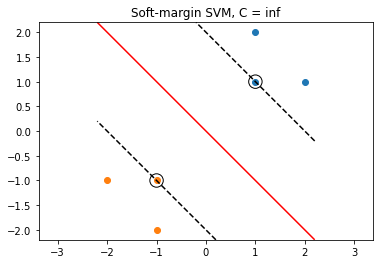

In [9]:
plot_points(X, y)
plt.axis('equal')
plot_boundary(plt.gca(), w, b, X[:, sv_idx])
plt.title('Soft-margin SVM, C = {}'.format(C));



## Toy data

### Load the data

In [10]:
data = np.load("data_svm1.npz", allow_pickle=True)
X_toy = data["X"]
y_toy = data["y"]

### Train Soft-margin SVM

In [29]:
C = np.inf
w, b, sv_idx = my_svm(X_toy, y_toy, C, options={'verb': False})

### Visualize

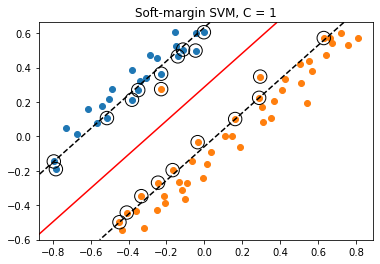

In [12]:
plot_points(X_toy, y_toy)
plot_boundary(plt.gca(), w, b, X_toy[:, sv_idx])
plt.title('Soft-margin SVM, C = {}'.format(C))
plt.savefig('linear_svm.png')



In [7]:
try:
    from ipywidgets import interact, interactive, fixed
    
    @interact(C=(0.001,10.,0.001))
    def soft_margin(C=1):
        w, b, sv_idx = my_svm(X_toy, y_toy, C, options={'verb': False})
        plot_points(X_toy, y_toy)
        plot_boundary(plt.gca(), w, b, X_toy[:, sv_idx])
        plt.title('Soft-margin SVM, C = {}'.format(C));
        
except ImportError:
    print('Optional feature.')

interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.001, step=0.001), Output()), _do…

## OCR data
### Load the data

In [25]:
data = np.load("data_svm1_images.npz", allow_pickle=True)
tst = data["tst"].item()
trn = data["trn"].item()

X_trn, y_trn, norm_trn = compute_measurements_2d(trn)

### Find optimal C
This will probably take around 10 minutes

In [26]:
np.random.seed(42)
trn_folds, tst_folds = crossval(y_trn.size, num_folds=10)

best_C = None
best_C_err = np.inf
for C in [10, 1, 0.1, 0.01, 0.001]:
    
    C_err = compute_test_error(trn_folds, tst_folds, X_trn, y_trn, C)
    
    if C_err < best_C_err:
        best_C_err = C_err
        best_C = C
    print('C {} -> err {}'.format(C, C_err))

print('best C: {}'.format(best_C))


KeyboardInterrupt: 

### Train SVM with optimal C

In [27]:
w, b, sv_idx = my_svm(X_trn, y_trn, best_C, options={'verb': False})

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

### visualize

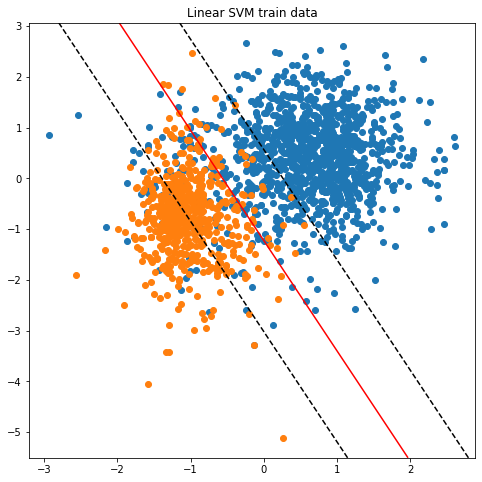

In [18]:
plt.figure(figsize=(8,8))
plot_points(X_trn, y_trn)
plot_boundary(plt.gca(), w, b, None)
plt.title('Linear SVM train data')
plt.savefig('ocr_svm_trn.png')



### Classify test data

In [19]:
X_tst, y_tst, norm_tst = compute_measurements_2d(tst, norm_trn)
classif = classif_linear_svm(X_tst, {'w': w, 'b': b})

In [20]:
error = np.mean(classif != y_tst)

### And visualize

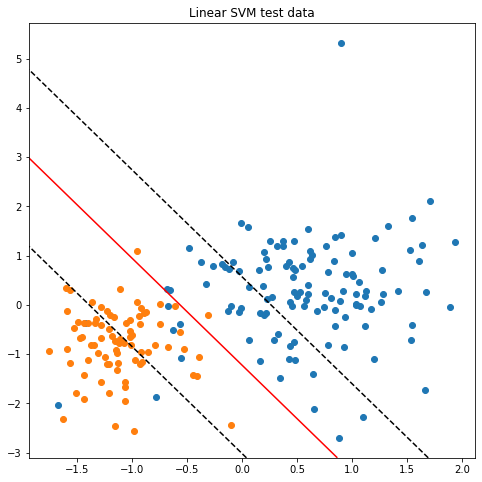

In [21]:
plt.figure(figsize=(8,8))
plot_points(X_tst, y_tst)
plot_boundary(plt.gca(), w, b, None)
plt.title('Linear SVM test data')
plt.savefig('ocr_svm_tst.png')



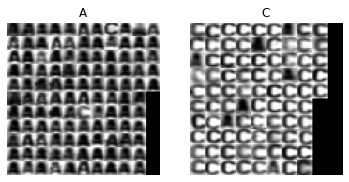

In [22]:
labels = classif.copy()
labels[labels == 1] = 0
labels[labels == -1] = 1

plt.figure()
show_classification(tst['images'], labels, 'AC')
plt.savefig('ocr_svm_classif.png')

